<a href="https://colab.research.google.com/github/Nivas-R/Oasis-Intern-Project-1/blob/main/OASISDA_Intern_LV1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df=pd.read_csv("menu.csv")
df.head()

# **Data** **Cleaning**


In [ ]:
print("Missing Values : \n", df.isnull().sum())
print("\n Duplicate Rows :", df.duplicated().sum())
print("\n Data Types :\n ", df.dtypes)

Missing Values : 
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

 Duplicate Rows : 0

 Data Types :
  Category                          object
Item                              object
Serving 

# **Handling Duplicate and Missing Values**

In [ ]:
df = df.drop_duplicates()
print("Duplicate Rows After Cleaning:", df.duplicated().sum())


Duplicate Rows After Cleaning: 0


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


# **Descriptive Statistics**

In [ ]:
print("Summary Statistics:\n", df.describe())
print("\n" + "="*50 + "\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")
    print(df[col].unique()[:10])
    print("-" * 40)


Summary Statistics:
           Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.3218

# **Time Series Analysis**

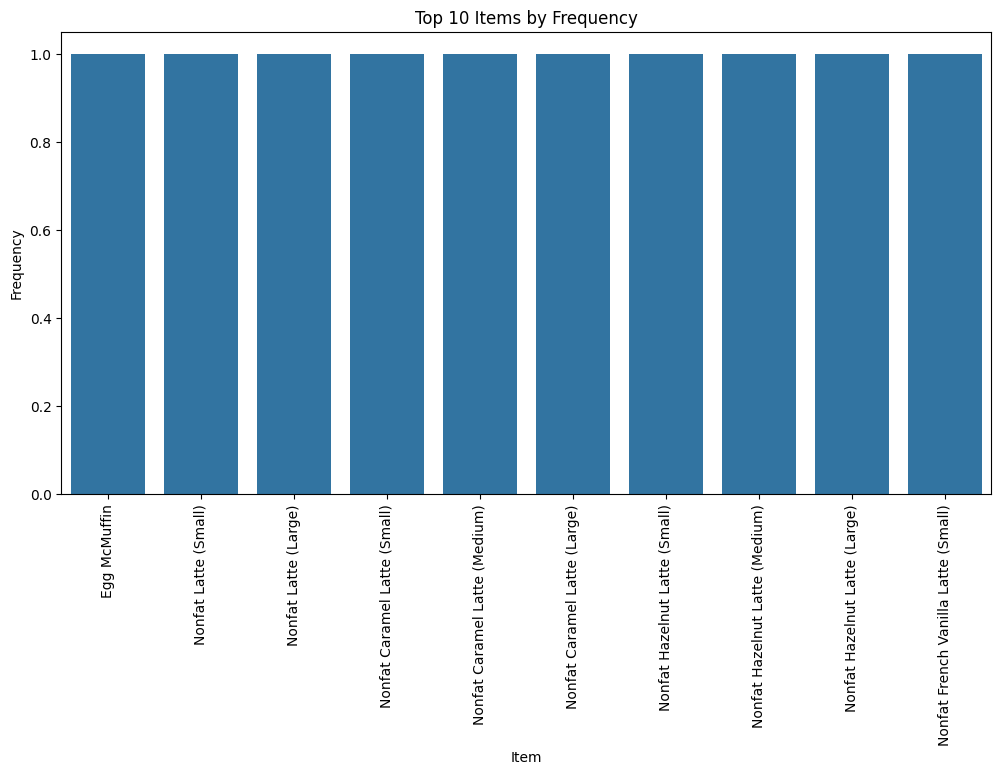

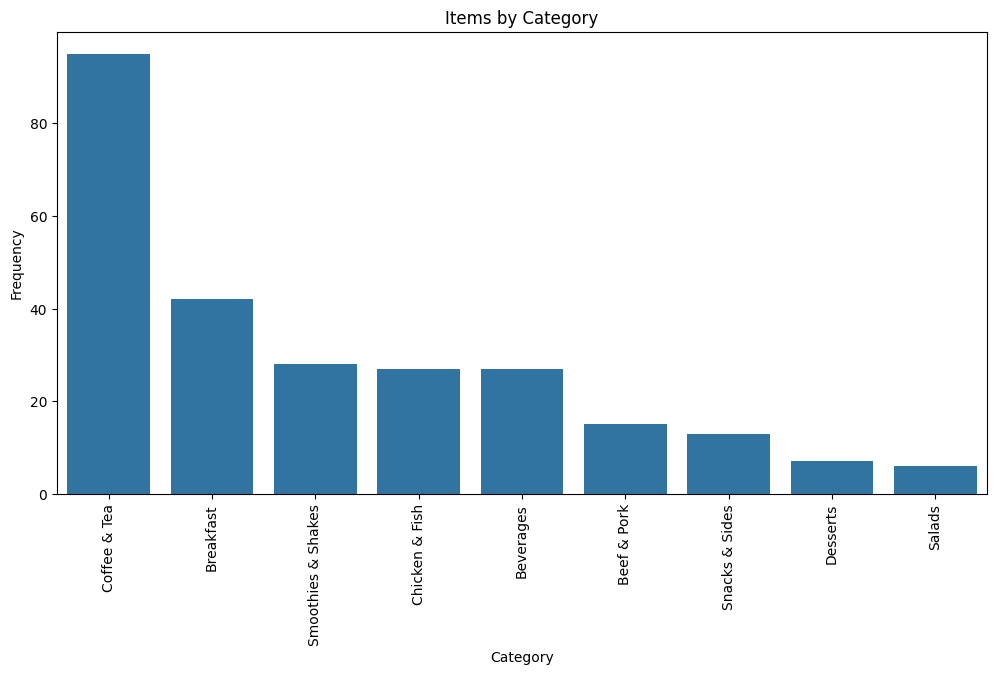

In [ ]:
import seaborn as sns
tem_counts = data['Item'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.head(10).index, y=item_counts.head(10).values)
plt.title('Top 10 Items by Frequency')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
category_counts = data['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Items by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# **Customer and Product Analysis**

In [ ]:
item_counts = data['Item'].value_counts()
print("Item Frequency:\n", item_counts.head(10))
category_counts = data['Category'].value_counts()
print("Category Frequency:\n", category_counts.head(10))

Item Frequency:
 Item
Egg McMuffin                           1
Nonfat Latte (Small)                   1
Nonfat Latte (Large)                   1
Nonfat Caramel Latte (Small)           1
Nonfat Caramel Latte (Medium)          1
Nonfat Caramel Latte (Large)           1
Nonfat Hazelnut Latte (Small)          1
Nonfat Hazelnut Latte (Medium)         1
Nonfat Hazelnut Latte (Large)          1
Nonfat French Vanilla Latte (Small)    1
Name: count, dtype: int64
Category Frequency:
 Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64


# **Visualization**

<ipython-input-34-a771f51201c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.head(10).index, y=item_counts.head(10).values, palette="viridis")


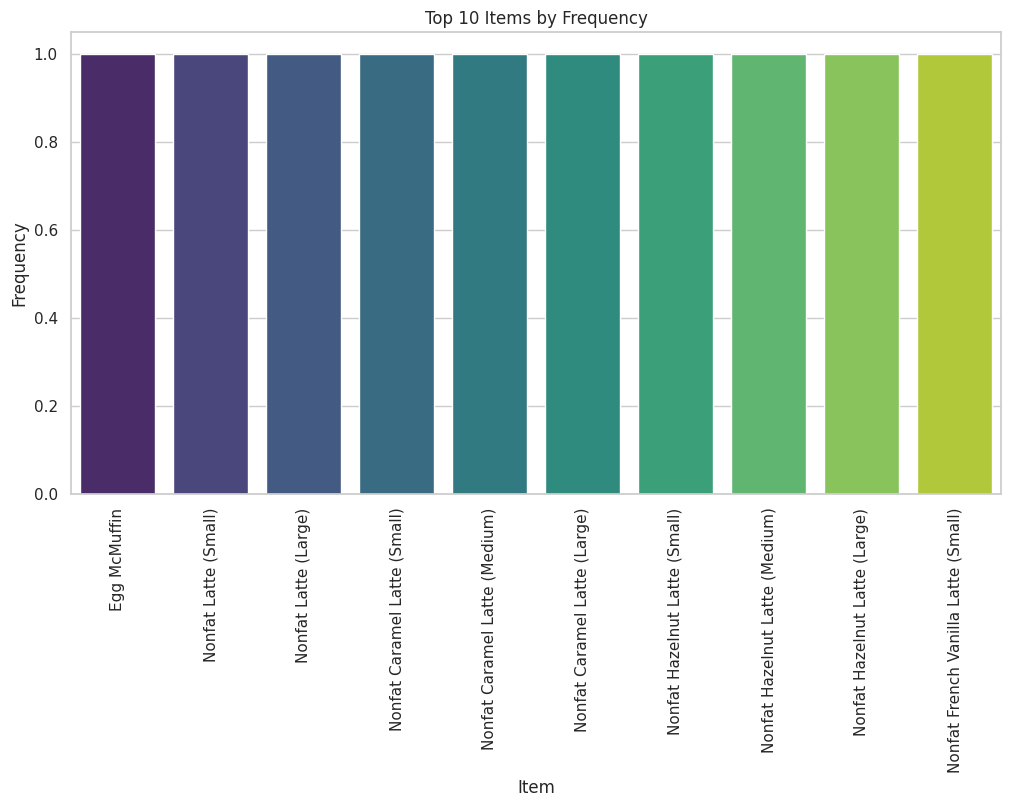

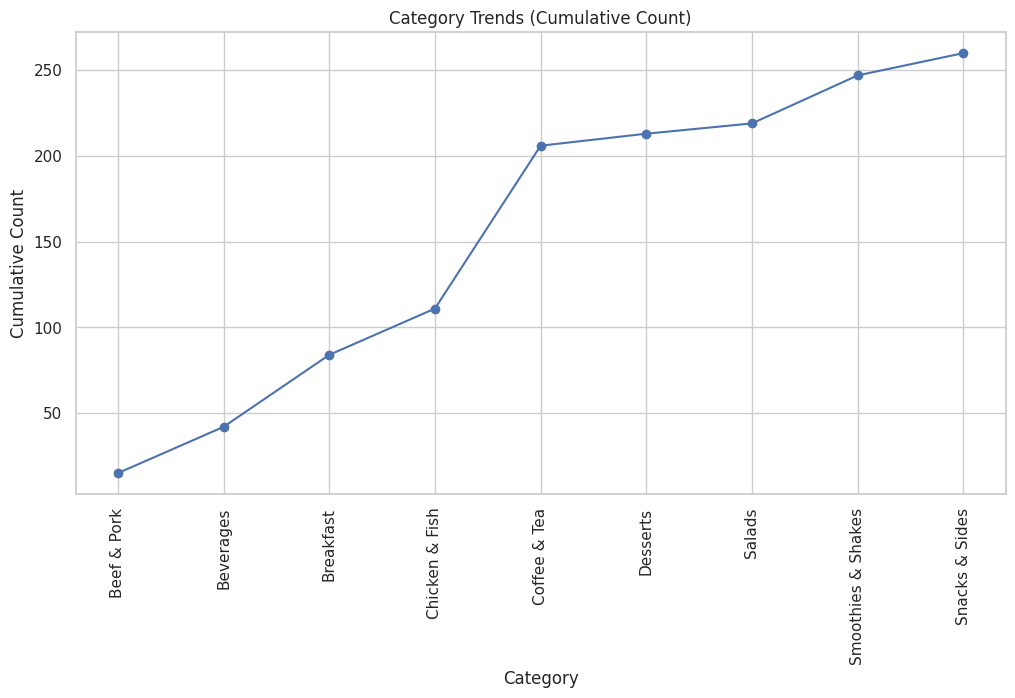

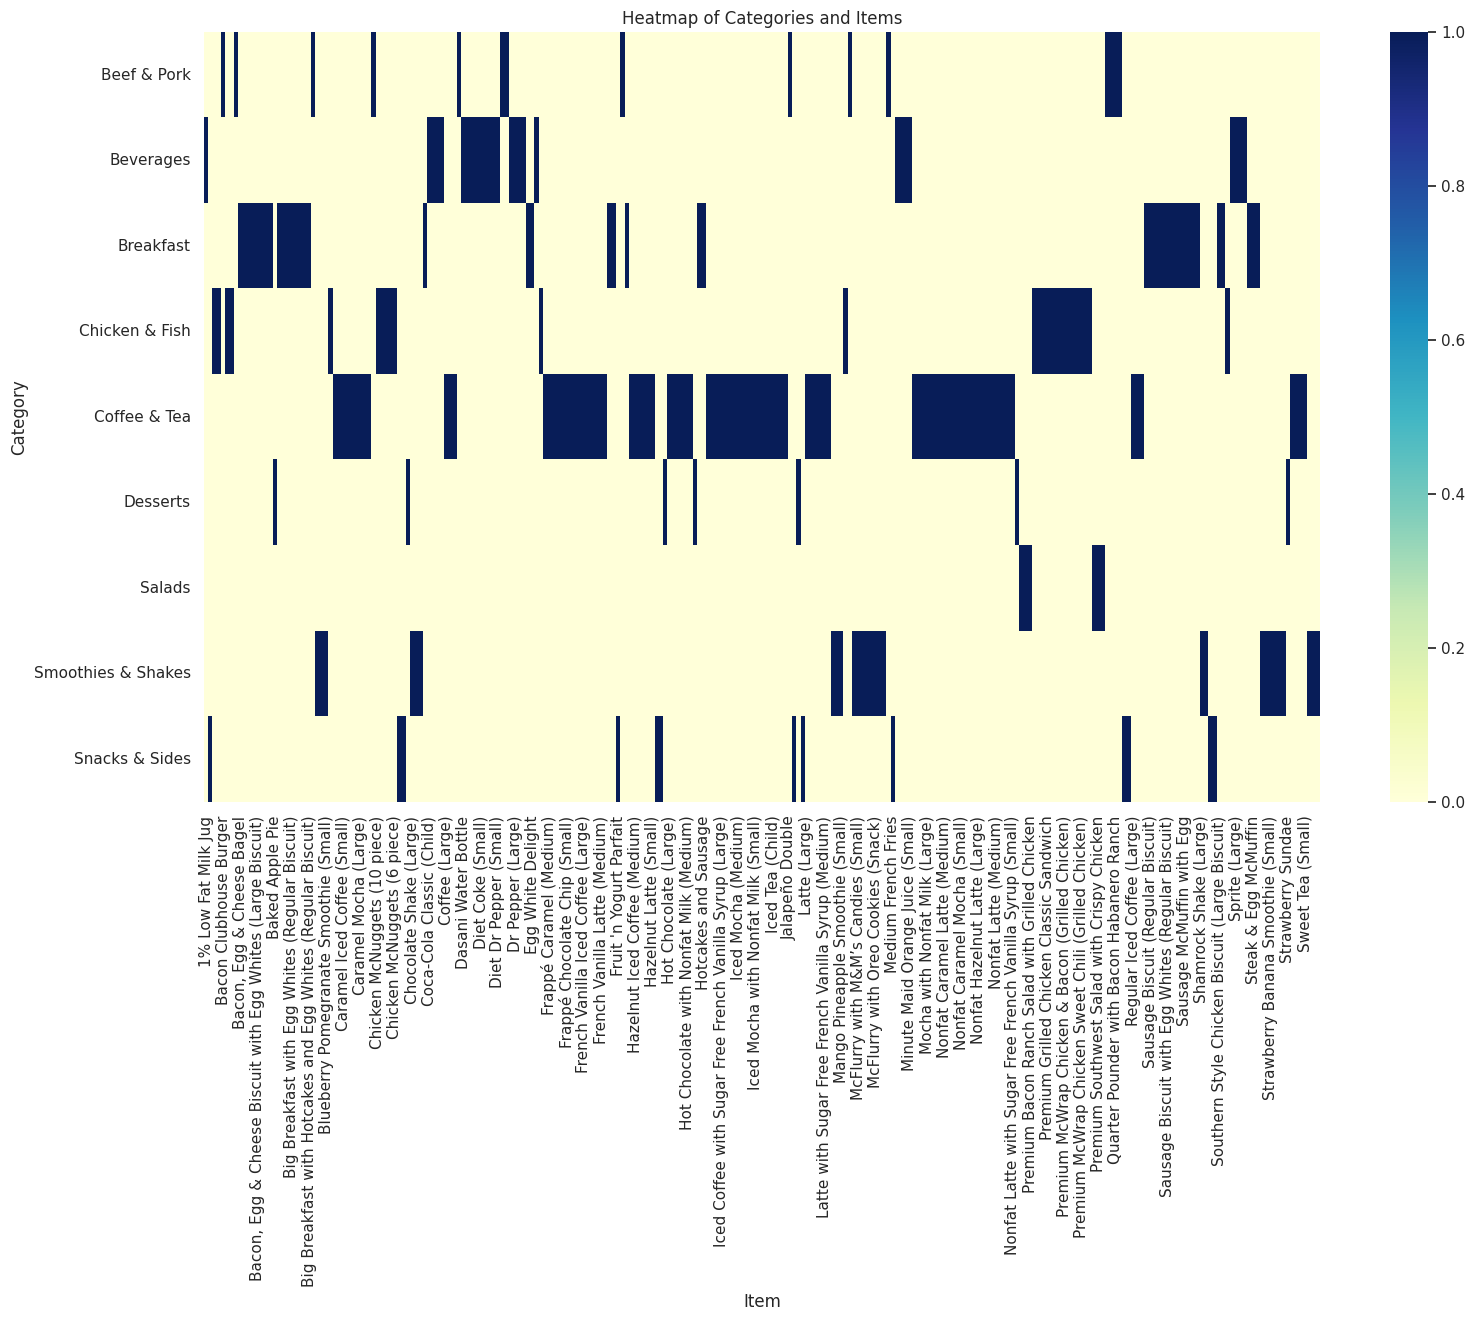

In [ ]:
category_item_crosstab = pd.crosstab(index=data['Category'], columns=data['Item'])
sns.set(style="whitegrid")
item_counts = data['Item'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.head(10).index, y=item_counts.head(10).values, palette="viridis")
plt.title('Top 10 Items by Frequency')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
# Line Plot
category_trends = data['Category'].value_counts().sort_index().cumsum()
plt.figure(figsize=(12, 6))
category_trends.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Category Trends (Cumulative Count)')
plt.xlabel('Category')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
# Plotting Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(category_item_crosstab, cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Categories and Items')
plt.xlabel('Item')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# **Recommendations**

In [ ]:

recommendations = """
1. Focus on Top-Selling Items: Based on the item frequency analysis, prioritize stocking and promoting the top 10 items that are most popular among customers.

2. Optimize Category Offerings: The category trends and heatmap indicate which categories are most popular. Focus on expanding offerings in these categories while considering reducing or discontinuing less popular categories.

3. Introduce New Items in Popular Categories: Consider introducing new items in the most popular categories to attract more customers and increase sales.

4. Monitor Seasonal Trends: Analyze the data periodically to identify any seasonal trends or shifts in customer preferences. Adjust menu offerings accordingly to meet changing demands.

5. Enhance Marketing Strategies: Use insights from the analysis to create targeted marketing campaigns promoting the most popular items and categories.

6. Customer Feedback: Gather feedback from customers on their favorite items and any suggestions for new menu items. Use this feedback to refine and improve the menu offerings.

7. Cross-Sell and Upsell: Leverage the popularity of top items to cross-sell and upsell complementary items, increasing overall sales and customer satisfaction.
"""

print("Actionable Recommendations Based on EDA:\n", recommendations)


Actionable Recommendations Based on EDA:
 
1. Focus on Top-Selling Items: Based on the item frequency analysis, prioritize stocking and promoting the top 10 items that are most popular among customers.

2. Optimize Category Offerings: The category trends and heatmap indicate which categories are most popular. Focus on expanding offerings in these categories while considering reducing or discontinuing less popular categories.

3. Introduce New Items in Popular Categories: Consider introducing new items in the most popular categories to attract more customers and increase sales.

4. Monitor Seasonal Trends: Analyze the data periodically to identify any seasonal trends or shifts in customer preferences. Adjust menu offerings accordingly to meet changing demands.

5. Enhance Marketing Strategies: Use insights from the analysis to create targeted marketing campaigns promoting the most popular items and categories.

6. Customer Feedback: Gather feedback from customers on their favorite items